전처리 중간과정을 진행할 때는 import, 한글깨짐 부분 실행하고 바로 해당 전처리 부분으로 넘어가서 db 가져오면 됨

In [1]:
# 시간 관리 및 데이터 정제
import datetime
import re

# 데이터 관리
import sqlite3
import pandas as pd
import numpy as np

# 텍스트 처리
from konlpy.tag import Hannanum
from nltk import Text
from nltk.tokenize import sent_tokenize, regexp_tokenize

# 시각화
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

# 기타
from collections import Counter
import ast
import pickle

In [2]:
# 한글깨짐 해결
plt.rcParams["font.family"] = "Malgun Gothic"
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (14,4)

# 마이너스 깨짐 해결
mpl.rcParams['axes.unicode_minus'] = False

# Tokenizing & Get Nouns

## Data Load (cleaned)

In [3]:
conn = sqlite3.connect('../../data/news_cleaned.db')
cur = conn.cursor()

In [4]:
query = cur.execute('SELECT * FROM news')
cols = [column[0] for column in query.description]
news_cleaned = pd.DataFrame.from_records(data=query.fetchall(), columns=cols)
news_cleaned.shape

(100000, 7)

In [5]:
cur.close()
conn.close()

## 형태소분석 - 명사 추출

In [6]:
han = Hannanum()

In [8]:
def get_nouns(row, col_name='body'):
    nouns_list = han.nouns(row[col_name])
    if row['id'] % 10000 == 0:
        print('{0} id {1} is processed'.format(datetime.datetime.now(), row['id']))
    return nouns_list

In [9]:
news_cleaned['body_nouns'] = news_cleaned.apply(get_nouns, col_name='body', axis=1)

2020-08-27 23:39:40.032654 id 0 is processed
2020-08-27 23:57:19.599290 id 10000 is processed
2020-08-28 00:14:28.932532 id 20000 is processed
2020-08-28 00:31:53.345109 id 30000 is processed
2020-08-28 00:51:47.546000 id 40000 is processed
2020-08-28 01:11:45.657429 id 50000 is processed
2020-08-28 01:22:49.533267 id 60000 is processed
2020-08-28 01:35:06.314902 id 70000 is processed
2020-08-28 01:47:34.390007 id 80000 is processed
2020-08-28 01:59:49.244506 id 90000 is processed


In [10]:
news_cleaned['summary_nouns'] = news_cleaned.apply(get_nouns, col_name='summary', axis=1)

2020-08-28 02:12:41.542850 id 0 is processed
2020-08-28 02:15:59.426611 id 10000 is processed
2020-08-28 02:19:16.208246 id 20000 is processed
2020-08-28 02:22:38.990867 id 30000 is processed
2020-08-28 02:26:02.996218 id 40000 is processed
2020-08-28 02:29:25.954369 id 50000 is processed
2020-08-28 02:32:28.847219 id 60000 is processed
2020-08-28 02:35:38.092017 id 70000 is processed
2020-08-28 02:38:46.339516 id 80000 is processed
2020-08-28 02:42:00.917081 id 90000 is processed


## pickle로 저장 (tokenized)
- 리스트 데이터가 string으로 변환되는 상황을 방지하고자 pickle로 저장함

In [14]:
news_cleaned.to_pickle('../../data/news_nouns.pickle')

# Normalization

## Data Load (tokenized)

In [3]:
news_tokenized = pd.read_pickle('../../data/news_nouns.pickle')
news_tokenized.shape

(100000, 9)

In [4]:
news_tokenized.head(3)

,id,title,date,body,summary,link,site,body_nouns,summary_nouns
0,0,"액상담배 美흡연자 8명 숨졌다, 복지부 ""한국 판매 금지 검토""",2019.09.20. 오후 6:38,"중증 폐질환 유발 가능성 있다 미국서 530건 의심환자 발생, 8명 사망국내 상황 ...",정부가 액상형 전자담배 사용 자제를 권고하고 나섰다.복지부는 미국 사례를 참조해 액...,https://news.naver.com/main/ranking/read.nhn?r...,naver,"[중증, 폐질환, 유발, 가능성, 미국서, 530건, 의심환자, 발생, 8명, 사망...","[정도, 외국, 에디슨, 러셀(키움, 히어로즈), 복덩, 험난, 7월, 반등, 성공..."
1,1,세력 키우는 태풍 '타파'…22일 밤 부산 앞바다 통과,2019.09.20. 오후 5:19,23일까지 강하고 많은 비제주에 최대 600밀리미터 물폭탄 제17호 태풍 타파가 한...,제17호 태풍 타파 가 한반도에 접근할수록 점점 강해지고 있는 데다 부산 앞바다를 ...,https://news.naver.com/main/ranking/read.nhn?r...,naver,"[23일, 제주, 최대, 600밀리미터, 물폭탄, 제17호, 태풍, 타파, 한반도,...","[세인트루이스, 카디널스, 구단, 코로나19, 확진자, 추가, 발생, 총, 6명, ..."
2,2,[내일날씨] 태풍 '타파' 북상…전국에 강한 비바람,2019.09.20. 오전 9:00,강한 비바람 때문에 행인이 우산을 꽉 붙잡고 지나가고 있다. 토요일인 21일 제17...,토요일인 21일 제17호 태풍 타파 영향으로 전국이 흐리고 비가 내리겠다.기상청은 ...,https://news.naver.com/main/ranking/read.nhn?r...,naver,"[비바람, 때문, 행인, 우산, 토요일, 21일, 제17호, 태풍, 타파, 영향, ...","[롯데, 자이언츠, 8월, 첫, 주말, 연승, 장식, 롯데, 2, 사직구장, 타이거..."


In [5]:
print(type(news_tokenized.loc[0, 'summary_nouns']))
news_tokenized.loc[0, 'summary_nouns'][:10]

<class 'list'>


['정도', '외국', '에디슨', '러셀(키움', '히어로즈)', '복덩', '험난', '7월', '반등', '성공']

##  (, ) 제거

In [6]:
def remove_parentheses(nouns_list):
    new_list = []
    for _ in nouns_list:
        new_list += re.split(r'[\(\)]', _)
    return [x for x in new_list if x != '']

In [7]:
news_tokenized['body_nouns'] = news_tokenized['body_nouns'].apply(remove_parentheses)

In [8]:
news_tokenized['summary_nouns'] = news_tokenized['summary_nouns'].apply(remove_parentheses)

## 숫자 제거

In [9]:
def remove_nums(nouns_list):
    '''명사 리스트 데이터를 받아 숫자를 제거하는 함수'''
    new_list = [re.sub(r'[0-9]+', '', x) for x in nouns_list]
    return [x for x in new_list if x != '']

In [10]:
news_tokenized.summary_nouns

0        [정도, 외국, 에디슨, 러셀, 키움, 히어로즈, 복덩, 험난, 7월, 반등, 성공...
1        [세인트루이스, 카디널스, 구단, 코로나19, 확진자, 추가, 발생, 총, 6명, ...
2        [롯데, 자이언츠, 8월, 첫, 주말, 연승, 장식, 롯데, 2, 사직구장, 타이거...
3        [웨, 루니, 더비, 카운티, 과거, 맨체스터, 유나이티드, 시절, 알렉스, 퍼거슨...
4        [정부, 액상형, 전자담배, 사용, 자제, 권고, 복지부, 미국, 사례, 참조, 액...
                               ...                        
99995    [히어로즈, 시리즈, 스윕, 달성, 2일, 대구, 삼성라이온즈파크, 삼성, 라이온즈...
99996    [잉글리시, 프리미어리그, EPL, 승격, 리즈, 유나이티드, 폭풍, 영입, 예고,...
99997    [마무리, 투수, 붕괴, 결과, 치열, 접전, 두산, 1일, 창원, 파크, 2020...
99998    [토트넘, 홋스퍼, 공격진, 보강, 성공, 데, 리, 메, 은, 2일, 한국시간, ...
99999    [롯데, 자이언츠, 허문회, 감독, 전준우, 재치, 주루, 플레이, 생각, 2, 3...
Name: summary_nouns, Length: 100000, dtype: object

In [11]:
remove_nums(news_tokenized.loc[2, 'summary_nouns'])[:10]

['롯데', '자이언츠', '월', '첫', '주말', '연승', '장식', '롯데', '사직구장', '타이거즈전']

In [12]:
news_tokenized['body_nouns'] = news_tokenized['body_nouns'].apply(remove_nums)

In [13]:
news_tokenized['summary_nouns'] = news_tokenized['summary_nouns'].apply(remove_nums)

In [16]:
news_tokenized.summary_nouns

0        [정도, 외국, 에디슨, 러셀, 키움, 히어로즈, 복덩, 험난, 월, 반등, 성공,...
1        [세인트루이스, 카디널스, 구단, 코로나, 확진자, 추가, 발생, 총, 명, 미국,...
2        [롯데, 자이언츠, 월, 첫, 주말, 연승, 장식, 롯데, 사직구장, 타이거즈전, ...
3        [웨, 루니, 더비, 카운티, 과거, 맨체스터, 유나이티드, 시절, 알렉스, 퍼거슨...
4        [정부, 액상형, 전자담배, 사용, 자제, 권고, 복지부, 미국, 사례, 참조, 액...
                               ...                        
99995    [히어로즈, 시리즈, 스윕, 달성, 일, 대구, 삼성라이온즈파크, 삼성, 라이온즈와...
99996    [잉글리시, 프리미어리그, EPL, 승격, 리즈, 유나이티드, 폭풍, 영입, 예고,...
99997    [마무리, 투수, 붕괴, 결과, 치열, 접전, 두산, 일, 창원, 파크, 신한은행,...
99998    [토트넘, 홋스퍼, 공격진, 보강, 성공, 데, 리, 메, 은, 일, 한국시간, 토...
99999    [롯데, 자이언츠, 허문회, 감독, 전준우, 재치, 주루, 플레이, 생각, 루, 사...
Name: summary_nouns, Length: 100000, dtype: object

## 불용어 처리

Zipf's Law

In [17]:
body_nouns = []
for _ in news_tokenized['body_nouns']:
    body_nouns += _

In [18]:
summary_nouns = []
for _ in news_tokenized['summary_nouns']:
    summary_nouns += _

In [19]:
vocabs_body = Text(body_nouns).vocab()

In [20]:
vocabs_summary = Text(summary_nouns).vocab()

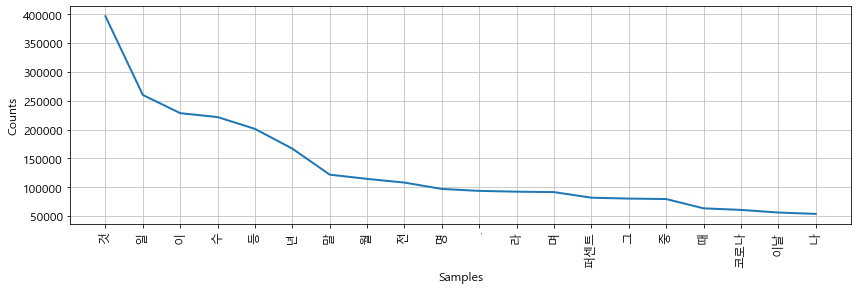

In [21]:
vocabs_body.plot(20)

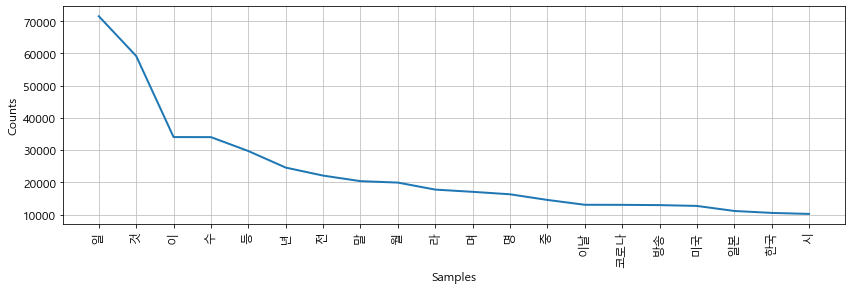

In [22]:
vocabs_summary.plot(20)

In [23]:
stopwords_list1 = []
for _ in vocabs_body.most_common(17):
    stopwords_list1.append(_[0])
for _ in vocabs_summary.most_common(13):
    stopwords_list1.append(_[0])

In [24]:
stopwords2 = pd.read_csv('../stopwords/stopwords_concat.csv')
stopwords_list2 = list(stopwords2['stopwords'].values)
len(stopwords_list2)

775

In [25]:
stopwords_list = stopwords_list1 + stopwords_list2
print(len(stopwords_list))
stopwords_list = list(set(stopwords_list))
print(len(stopwords_list))

805
668


In [26]:
def remove_stopwords(nouns_list, stopwords_list):
    '''명사 리스트 데이터를 받아 불용어를 처리하는 함수'''
    new_list = [x for x in nouns_list if x not in stopwords_list]
    return new_list

In [27]:
news_tokenized['body_nouns'] = news_tokenized['body_nouns'].apply(remove_stopwords, stopwords_list=stopwords_list)

In [28]:
news_tokenized['summary_nouns'] = news_tokenized['summary_nouns'].apply(remove_stopwords, stopwords_list=stopwords_list)

In [29]:
news_tokenized['summary_nouns']

0        [외국, 에디슨, 러셀, 키움, 히어로즈, 복덩, 험난, 반등, 성공, 타격, 마운...
1        [세인트루이스, 카디널스, 구단, 코로나, 확진자, 추가, 발생, 총, 미국, 매체...
2        [롯데, 자이언츠, 첫, 주말, 연승, 장식, 롯데, 사직구장, 타이거즈전, 이닝,...
3        [웨, 루니, 더비, 카운티, 과거, 맨체스터, 유나이티드, 시절, 알렉스, 퍼거슨...
4        [정부, 액상형, 전자담배, 사용, 자제, 권고, 복지부, 미국, 사례, 참조, 액...
                               ...                        
99995    [히어로즈, 시리즈, 스윕, 달성, 대구, 삼성라이온즈파크, 삼성, 라이온즈와, 경...
99996    [잉글리시, 프리미어리그, EPL, 승격, 리즈, 유나이티드, 폭풍, 영입, 예고,...
99997    [마무리, 투수, 붕괴, 결과, 치열, 접전, 두산, 창원, 파크, 신한은행, 리그...
99998    [토트넘, 홋스퍼, 공격진, 보강, 성공, 리, 메, 은, 한국시간, 토트넘, 왓포...
99999    [롯데, 자이언츠, 허문회, 감독, 전준우, 재치, 주루, 플레이, 루, 사이, 전...
Name: summary_nouns, Length: 100000, dtype: object

## pickle로 저장 (normalized)

In [30]:
news_tokenized.to_pickle('../../data/news_normalized_final.pickle')